In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
from scipy.stats import chi2
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/DMfit/DMfit")
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/PDFs")
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/DetResponse")
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/Utils")

from Detector import *
from Signal import *
from Plot_Histogram import *

from modeling import PdfBase, Model, Parameter
from data import DataSet
from llh import LikelihoodRatioTest
from scipy.interpolate import interp1d


In [43]:
# First the signal pdf

# channel and mass
channel = "numunumu"
mass = 100
profile='NFW'
# Bin
Bin = Std_Binning(100)
Reco = RecoRate(channel, 
            mass, 
            profile, 
            Bin,
            type="Resp")
Reco_Scr = RecoRate(channel, 
            mass, 
            profile, 
            Bin,
            Scramble=True)

In [44]:
Rate = Reco.ComputeRecoRate()
Rate_Scr = Reco_Scr.ComputeRecoRate()

********************
Buiding final reco rate using Resp method
********************
Computing true rate with Charon spectra
channel: numunumu || mass: 100 || profile: NFW || process: ann

Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5
********************
Computing Response Matrix
********************
Accessing MC set 0000
********************
Buiding final reco rate using Resp method
********************
Computing true rate with Charon spectra
channel: numunumu || mass: 100 || profile: NFW || process: ann

Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5
********************
Computing Response Matrix
********************
Accessing MC set 0000


In [60]:
# Bkg from scramble data
Bkg_nokde = ScrambleBkg(Bin, kde=False)
Bkg_bwISJ = ScrambleBkg(Bin, bw="ISJ", oversample=10)
Bkg_bwCV = ScrambleBkg(Bin, bw=0.07)
Burnsample = DataHist(Bin)


Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2012_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2013_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2014_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2015_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2016_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2017_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscN

/tmp/ipykernel_9179/3580844928.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(Rate/np.sum(Rate), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), "Psi", "Energy", "Signal - Charon" "\n" "NFW {} - {} GeV".format(channel, mass))


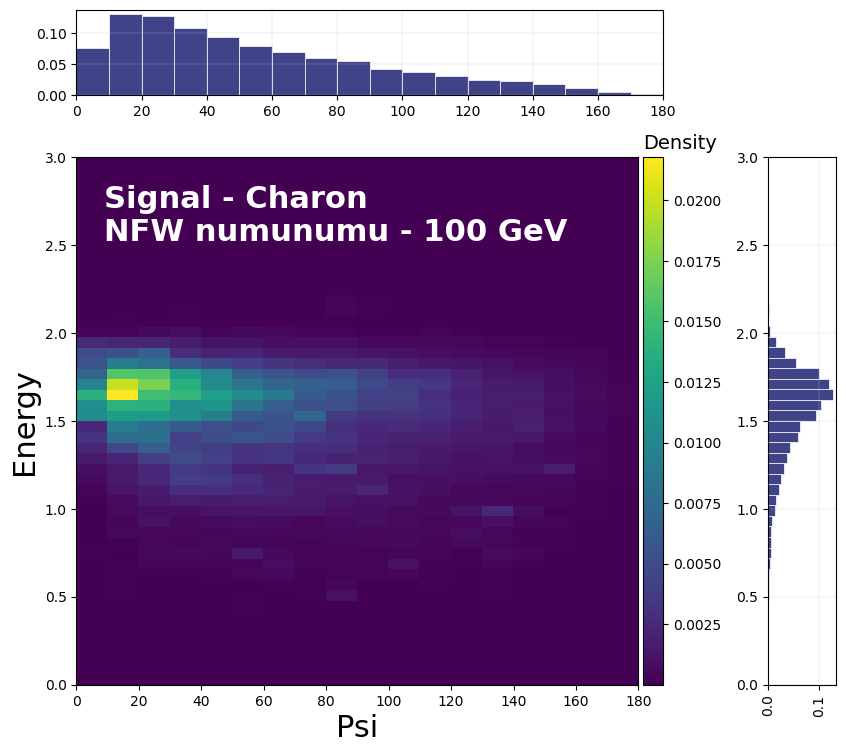

/tmp/ipykernel_9179/3580844928.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(Rate_Scr/np.sum(Rate_Scr), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), "Psi", "Energy", "Scrambled Signal - Charon" "\n" "NFW {} - {} GeV".format(channel, mass))


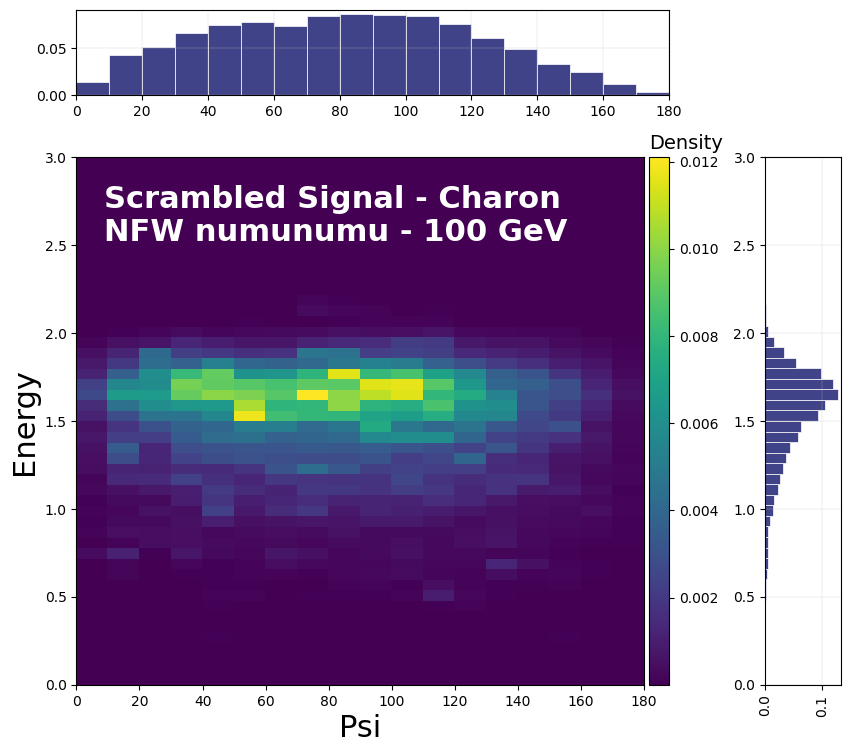

/tmp/ipykernel_9179/3580844928.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(Bkg_bwISJ/np.sum(Bkg_bwISJ), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), "Psi", "Energy", "Scramble Bkg")


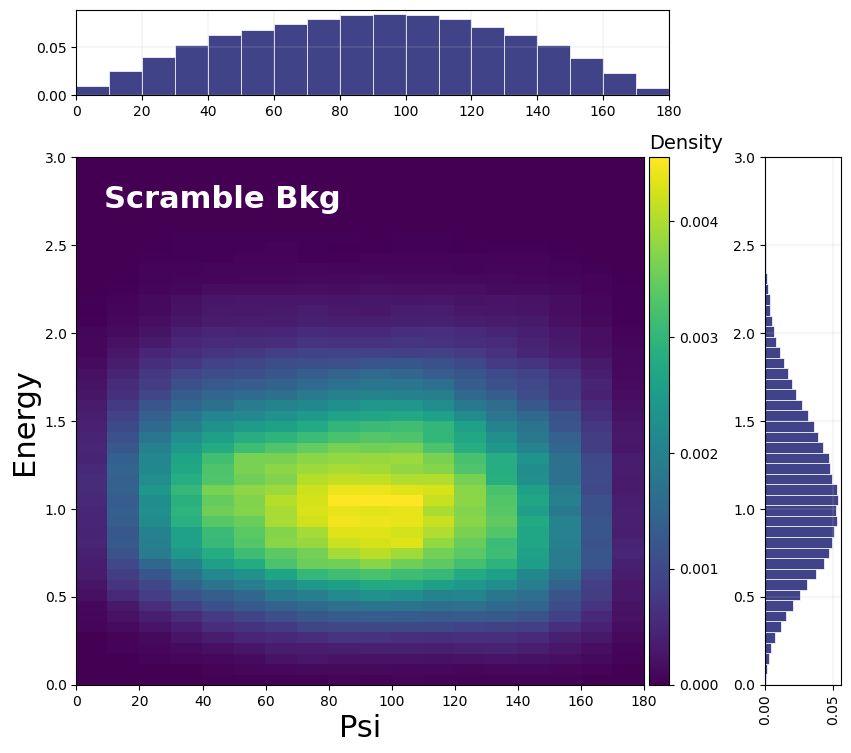

In [61]:
plot_projections(Rate/np.sum(Rate), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), "Psi", "Energy", "Signal - Charon" "\n" "NFW {} - {} GeV".format(channel, mass))
plot_projections(Rate_Scr/np.sum(Rate_Scr), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), "Psi", "Energy", "Scrambled Signal - Charon" "\n" "NFW {} - {} GeV".format(channel, mass))

plot_projections(Bkg_bwISJ/np.sum(Bkg_bwISJ), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), "Psi", "Energy", "Scramble Bkg")

In [11]:
Reco_evtbyevt = RecoRate(channel, 
            mass, 
            profile, 
            Bin,
            type="evtbyevt", Scramble=False)

Rate_evtbyevt = Reco_evtbyevt.ComputeRecoRate()          

********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
##Applying cut on weight##
Weight lim: 30698211342548.52
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
##Applying cut on weight##
Weight lim: 5399835012572.759
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
##Applying cut on weight##
Weight lim: 18290513172919.613
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
##Applying cut on weight##
Weight lim: 15584871386511.139
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
##Applying cut on weight##
Weight lim: 22541816424695.1

/tmp/ipykernel_5798/547832352.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(Rate_evtbyevt/np.sum(Rate_evtbyevt), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), "Psi", "Energy", "Scramble signal evt-by-evt")


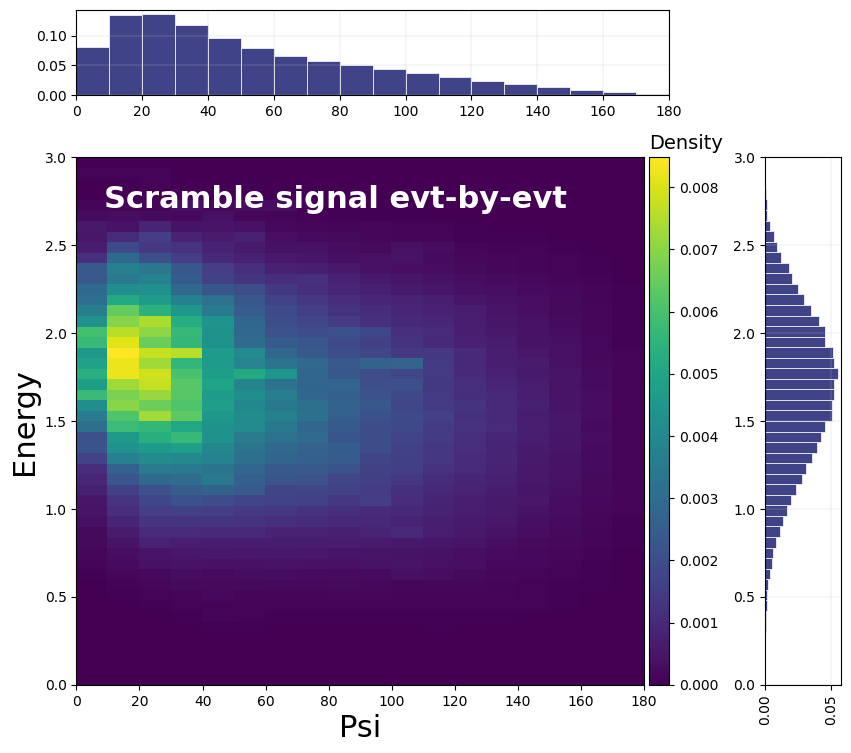

In [12]:
plot_projections(Rate_evtbyevt/np.sum(Rate_evtbyevt), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), "Psi", "Energy", "Scramble signal evt-by-evt")


In [27]:
np.sum(Rate_evtbyevt)/np.sum(Rate)

1.1045054115385797

In [63]:
SignalPDF = PdfBase(Rate.flatten()/np.sum(Rate.flatten()), name="SignalPDF")
ScrSignalPDF = PdfBase(Rate_Scr.flatten()/np.sum(Rate_Scr.flatten()), name="ScrSignalPDF")
BkgPDF = PdfBase(Bkg_bwISJ.flatten()/np.sum(Bkg_bwISJ.flatten()), name="Bkg")


In [53]:
np.sum(Burnsample)

36638.0

In [54]:
fsig = Parameter(value=0.5, limits=(0,1), fixed=False, name="f_sig")
siginjec = Parameter(value=0.0, limits=(0,1), fixed=True, name="signal_injection")

model = (fsig* SignalPDF) + (1-fsig)*(BkgPDF) + fsig* BkgPDF-fsig*ScrSignalPDF
null_model = (siginjec* SignalPDF) + (1-siginjec)*(BkgPDF) + siginjec*BkgPDF- siginjec*ScrSignalPDF

Parameter f_sig already exists in the model, it won't be added again
PDF Bkg already exists in the model, it won't be added again
Parameter f_sig already exists in the model, it won't be added again
Parameter f_sig already exists in the model, it won't be added again
Parameter signal_injection already exists in the model, it won't be added again
PDF Bkg already exists in the model, it won't be added again
Parameter signal_injection already exists in the model, it won't be added again
Parameter signal_injection already exists in the model, it won't be added again


In [74]:
print(null_model)
print ("-------------")
print(model)


 Model: signal_injection*SignalPDF + (1-signal_injection) * Bkg + signal_injection*Bkg - signal_injection*ScrSignalPDF
 Number of pdf: 3
 - SignalPDF
 - Bkg
 - ScrSignalPDF
 Number of parameters: 1
 Name: signal_injection, Value: 0.00, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: True, Is nuisance? False
-------------
 Model: f_sig*SignalPDF + (1-f_sig) * Bkg + f_sig*Bkg - f_sig*ScrSignalPDF
 Number of pdf: 3
 - SignalPDF
 - Bkg
 - ScrSignalPDF
 Number of parameters: 1
 Name: f_sig, Value: 0.50, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? False


In [76]:
ds = DataSet()
# ds.sample(1., null_model)
ds.sample(np.sum(Burnsample), model)
print (ds)

DataSet type simulation
Total number of events: 36514


In [77]:
lr = LikelihoodRatioTest(model = model, null_model = null_model)
lr.data = ds
lr.fit("H1")

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -1.238e+05                 │         Nfcn = 13 (13 total)         │
│ EDM = 1.19e-07 (Goal: 0.0001)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ f_sig │   0.498   │   0.006   │            │            │    0    │    1    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [78]:
lr.fit("H0")

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -1.204e+05                 │          Nfcn = 1 (1 total)          │
│ EDM = -1.2e+05 (Goal: 0.0001)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │       SOME Parameters at limit       │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │APPROXIMATE│  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name             │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ signal_injection │    0.0    │    0.1    │            │            │    0    │    1    │  yes  │
└───┴──────────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [79]:
import iminuit
print(iminuit.__version__)

1.5.4


In [80]:
lr.TS

6893.7623981316865

In [ ]:
# Trial on background!
# 10000 pts in ~ 10 minutes
# Ntrial = 100000
# TSdist = np.array([])
# for i in range(Ntrial):
#     ds.sample(1., null_model)
#     lr.data = ds
#     lr.fit("H1")
#     lr.fit("H0")
#     TSdist = np.append(TSdist, lr.TS)



# <font color="darkmagenta"> Check signal recovery </font>

In [64]:
sig_fit = Parameter(value=0.5, limits=(0,1), fixed=False, name="sig_fit")
sig_inj = Parameter(value=0.0, limits=(0,1), fixed=True, name="sig_inj")

model = (sig_fit* SignalPDF) + (1-sig_fit)*(BkgPDF) + sig_fit* BkgPDF - sig_fit*ScrSignalPDF
pseudo_data = (sig_inj* SignalPDF) + (1-sig_inj)*(BkgPDF)#+ sig_inj* BkgPDF - sig_inj*ScrSignalPDF
lr = LikelihoodRatioTest(model = model, null_model = pseudo_data)


Parameter sig_fit already exists in the model, it won't be added again
PDF Bkg already exists in the model, it won't be added again
Parameter sig_fit already exists in the model, it won't be added again
Parameter sig_fit already exists in the model, it won't be added again
Parameter sig_inj already exists in the model, it won't be added again


Using signal subtraction likelihood

In [65]:
f_inj = np.linspace(0, 0.005, 50)
ds = DataSet()
signal = dict()
for inj in f_inj:
    # change the signal injection:
    pseudo_data.parameters["sig_inj"].value = inj
    signal[inj] = np.array([])
    for n in range(100):
        ds.sample(np.sum(10*Burnsample), pseudo_data)
        
        # If Scramble pseudo data is used to estimate the background:
        lr.models['H1'] = (sig_fit* SignalPDF) + (1-pseudo_data.parameters["sig_inj"])*(BkgPDF) + pseudo_data.parameters["sig_inj"]* ScrSignalPDF - sig_fit*ScrSignalPDF
                
        lr.data = ds
        lr.fit("H1")
        fitval = lr.models['H1'].parameters["sig_fit"].value
        signal[inj] = np.append(signal[inj], fitval)


Parameter sig_inj already exists in the model, it won't be added again
PDF ScrSignalPDF already exists in the model, it won't be added again
Parameter sig_fit already exists in the model, it won't be added again
Parameter sig_inj already exists in the model, it won't be added again
PDF ScrSignalPDF already exists in the model, it won't be added again
Parameter sig_fit already exists in the model, it won't be added again
Parameter sig_inj already exists in the model, it won't be added again
PDF ScrSignalPDF already exists in the model, it won't be added again
Parameter sig_fit already exists in the model, it won't be added again


/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


Parameter sig_inj already exists in the model, it won't be added again
PDF ScrSignalPDF already exists in the model, it won't be added again
Parameter sig_fit already exists in the model, it won't be added again
Parameter sig_inj already exists in the model, it won't be added again
PDF ScrSignalPDF already exists in the model, it won't be added again
Parameter sig_fit already exists in the model, it won't be added again
Parameter sig_inj already exists in the model, it won't be added again
PDF ScrSignalPDF already exists in the model, it won't be added again
Parameter sig_fit already exists in the model, it won't be added again
Parameter sig_inj already exists in the model, it won't be added again
PDF ScrSignalPDF already exists in the model, it won't be added again
Parameter sig_fit already exists in the model, it won't be added again
Parameter sig_inj already exists in the model, it won't be added again
PDF ScrSignalPDF already exists in the model, it won't be added again
Parameter s

In [66]:
mean = np.array([])
low1 = np.array([])
low2 = np.array([])

up1 = np.array([])
up2 = np.array([])

for inj in f_inj:
    arr1 = np.percentile(signal[inj], [32, 50, 68])
    arr2 = np.percentile(signal[inj], [10, 50, 90])

    mean = np.append(mean, arr1[1])
    low1 = np.append(low1, arr1[0])
    up1 = np.append(up1, arr1[2])
    low2 = np.append(low2, arr2[0])
    up2 = np.append(up2, arr2[2])

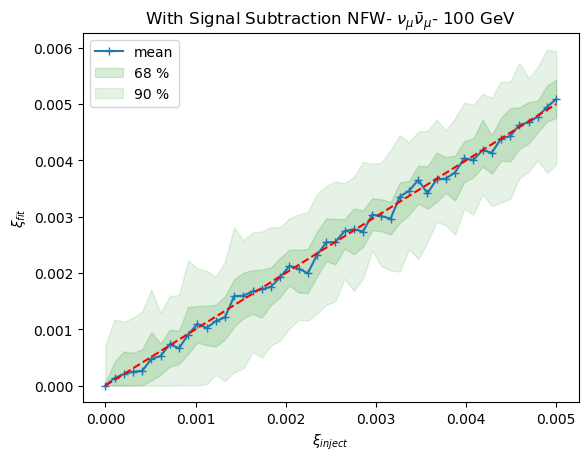

In [67]:
plt.plot(f_inj, mean, marker="+", label='mean')

plt.fill_between(f_inj, up1, low1, alpha=.15, color='green', label='68 %')
plt.fill_between(f_inj, up2, low2, alpha=.1, color='green', label='90 %')

plt.title('With Signal Subtraction {}'.format(profile)+ r"- $\nu_\mu \bar{\nu}_\mu$" + "- {} GeV".format(mass))
plt.plot(f_inj, f_inj, color='red', ls='--')
# plt.xlim(0,0.002)
# plt.ylim(0,0.002)
plt.xlabel(r"$\xi_{inject}$")
plt.ylabel(r"$\xi_{fit}$")
plt.legend(loc=2)

Using normal likelihood

In [68]:
f_inj = np.linspace(0, 0.005, 50)
ds = DataSet()
signal = dict()
for inj in f_inj:
    # change the signal injection:
    pseudo_data.parameters["sig_inj"].value = inj
    signal[inj] = np.array([])
    for n in range(100):
        ds.sample(np.sum(10*Burnsample), pseudo_data)
        # If Scramble pseudo data is used to estimate the background:
        lr.models['H1'] = (sig_fit* SignalPDF) + (1-sig_fit)*((1-pseudo_data.parameters["sig_inj"])*(BkgPDF) + pseudo_data.parameters["sig_inj"]* ScrSignalPDF)
                
        lr.data = ds
        lr.fit("H1")
        fitval = lr.models['H1'].parameters["sig_fit"].value
        signal[inj] = np.append(signal[inj], fitval)

Parameter sig_inj already exists in the model, it won't be added again
Parameter sig_fit already exists in the model, it won't be added again
Parameter sig_inj already exists in the model, it won't be added again
Parameter sig_fit already exists in the model, it won't be added again


/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


Parameter sig_inj already exists in the model, it won't be added again
Parameter sig_fit already exists in the model, it won't be added again
Parameter sig_inj already exists in the model, it won't be added again
Parameter sig_fit already exists in the model, it won't be added again
Parameter sig_inj already exists in the model, it won't be added again
Parameter sig_fit already exists in the model, it won't be added again
Parameter sig_inj already exists in the model, it won't be added again
Parameter sig_fit already exists in the model, it won't be added again
Parameter sig_inj already exists in the model, it won't be added again
Parameter sig_fit already exists in the model, it won't be added again
Parameter sig_inj already exists in the model, it won't be added again
Parameter sig_fit already exists in the model, it won't be added again
Parameter sig_inj already exists in the model, it won't be added again
Parameter sig_fit already exists in the model, it won't be added again
Parame

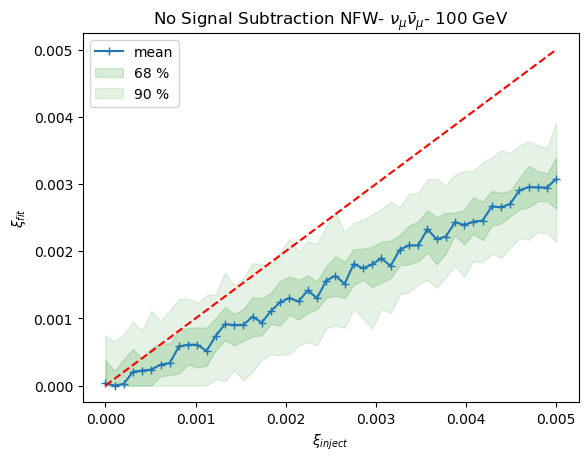

In [69]:
mean = np.array([])
low1 = np.array([])
low2 = np.array([])

up1 = np.array([])
up2 = np.array([])

for inj in f_inj:
    arr1 = np.percentile(signal[inj], [32, 50, 68])
    arr2 = np.percentile(signal[inj], [10, 50, 90])

    mean = np.append(mean, arr1[1])
    low1 = np.append(low1, arr1[0])
    up1 = np.append(up1, arr1[2])
    low2 = np.append(low2, arr2[0])
    up2 = np.append(up2, arr2[2])


plt.plot(f_inj, mean, marker="+", label='mean')

plt.fill_between(f_inj, up1, low1, alpha=.15, color='green', label='68 %')
plt.fill_between(f_inj, up2, low2, alpha=.1, color='green', label='90 %')

plt.title('No Signal Subtraction {}'.format(profile)+ r"- $\nu_\mu \bar{\nu}_\mu$" + "- {} GeV".format(mass))
plt.plot(f_inj, f_inj, color='red', ls='--')
# plt.xlim(0,0.002)
# plt.ylim(0,0.002)
plt.xlabel(r"$\xi_{inject}$")
plt.ylabel(r"$\xi_{fit}$")
plt.legend(loc=2)


# <font color="darkmagenta"> Finding upper limit using Asimov dataset (no trials) </font>

In [69]:
sig_fit = Parameter(value=0.001, limits=(0,1), fixed=False, name="fit")
sig_fix = Parameter(value=0.0, limits=(0,1), fixed=True, name="fix")
sig_inj = Parameter(value=0.0, limits=(0,1), fixed=True, name="inj")

# signal subtraction
modelH1 = (sig_fit* SignalPDF) + (1-sig_fit)*(BkgPDF) + sig_fit* BkgPDF - sig_fit*ScrSignalPDF
modelH0 = (sig_fix* SignalPDF) + (1-sig_fix)*(BkgPDF) + sig_fix* BkgPDF - sig_fix*ScrSignalPDF

# # in case of normal likelihood:
# modelH1 = (sig_fit* SignalPDF) + (1-sig_fit)*(BkgPDF)
# modelH0 = (sig_fix* SignalPDF) + (1-sig_fix)*(BkgPDF)

lr = LikelihoodRatioTest(model = modelH1, null_model = modelH0)
# pseudo_data = (sig_inj* SignalPDF) + (1-sig_inj)*(BkgPDF) + sig_inj* BkgPDF - sig_inj*ScrSignalPDF
pseudo_data = (sig_inj* SignalPDF) + (1-sig_inj)*(BkgPDF)


data = DataSet()
data.asimov(np.sum(10*Burnsample), pseudo_data)
lr.data = data
# lr.fit("H1")

Parameter fit already exists in the model, it won't be added again
PDF Bkg already exists in the model, it won't be added again
Parameter fit already exists in the model, it won't be added again
Parameter fit already exists in the model, it won't be added again
Parameter fix already exists in the model, it won't be added again
PDF Bkg already exists in the model, it won't be added again
Parameter fix already exists in the model, it won't be added again
Parameter fix already exists in the model, it won't be added again
Parameter inj already exists in the model, it won't be added again


In [70]:
xi = np.linspace(0,0.005,100)
T = np.array([])
for x in xi:
    lr.models['H0'].parameters["fix"].value = x
    lr.fit("H0")
    lr.fit("H1")
    if lr.models['H1'].parameters["fit"].value > x:
        T = np.append(T, 0)
    else:    
        T = np.append(T, lr.TS)


/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


array(0.00041861)

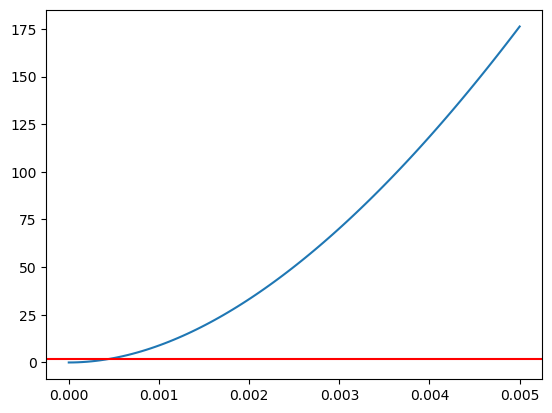

In [71]:
plt.plot(xi, T)
plt.axhline(y=1.64, color='r', linestyle='-')
# plt.ylim(0, 25)
# plt.xlim(0.0, 0.025)
from scipy.interpolate import interp1d
f = interp1d(T, xi)
f(1.64)


In [2]:
T = np.array([])
for i in range(10):
    # f = pkl.load(open("/data/user/tchau/Sandbox/GC_OscNext/Sensitivity/TSdist_WW_100_MC0000_Sig0.55567893_SignalSubtractionTrue_BkgTrial1/{}.pkl".format(i), "rb"))
    f = pkl.load(open("/data/user/tchau/Sandbox/GC_OscNext/Sensitivity/TSdist_WW_100_MC0000_Sig0.0_SignalSubtractionTrue/{}.pkl".format(i), "rb"))

    T = np.append(T, f)

FileNotFoundError: [Errno 2] No such file or directory: '/data/user/tchau/Sandbox/GC_OscNext/Sensitivity/TSdist_WW_100_MC0000_Sig0.0_SignalSubtractionTrue/0.pkl'

Text(0.5, 0, 'f(\\lambda_{0}|0)')

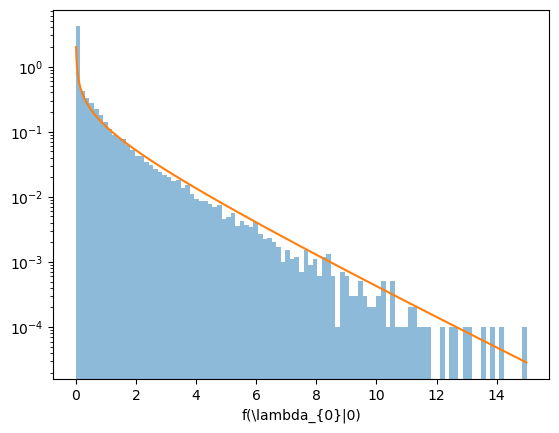

In [8]:
bin = np.linspace(0, 15, 100)
plt.hist(T, bin, density=True, alpha=0.5)

x = np.arange(0, 15, 0.01)
plt.plot(x, 1/2*chi2.pdf(x, df=1))
plt.semilogy()
plt.xlabel(r"f(\lambda_{0}|0)")


In [64]:
Tbkg = np.array([])
for i in range(0,10):
    f = pkl.load(open("/data/user/tchau/Sandbox/GC_OscNext/Sensitivity/TSdist/TSdist_numunumu_200.0_MC0000_Sig0.00046392506073450137_SignalSubtractionTrue_BkgTrial1/{}.pkl".format(i), "rb"))
    # f = pkl.load(open("/data/user/tchau/Sandbox/GC_OscNext/Sensitivity/TSdist/TSdist_WW_100_MC0000_Sig0.00198054_SignalSubtractionTrue_BkgTrial1/{}.pkl".format(i), "rb"))
    Tbkg = np.append(Tbkg, f)

T90 = np.array([])
for i in range(0,10):
    f = pkl.load(open("/data/user/tchau/Sandbox/GC_OscNext/Sensitivity/TSdist/TSdist_numunumu_200.0_MC0000_Sig0.00046392506073450137_SignalSubtractionTrue_BkgTrial0/{}.pkl".format(i), "rb"))
    # f = pkl.load(open("/data/user/tchau/Sandbox/GC_OscNext/Sensitivity/TSdist/TSdist_WW_100_MC0000_Sig0.00198054_SignalSubtractionTrue_BkgTrial0/{}.pkl".format(i), "rb"))
    T90 = np.append(T90, f)    

Text(0.5, 0, '$\\lambda$')

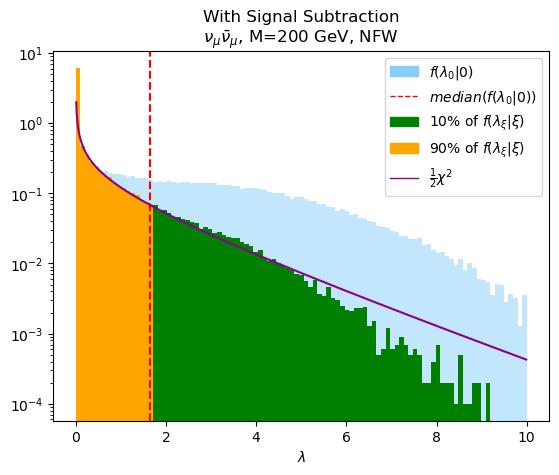

In [66]:
bin = np.linspace(0, 10, 100)
plt.hist(Tbkg, bin, density=True, alpha=0.5, label=r"$f(\lambda_0|0)$", color='lightskyblue')
plt.axvline(x=1.64, color='r', linestyle='--', label=r"$median(f(\lambda_0|0))$")


x = np.arange(0, 10, 0.01)
plt.plot(x, 1/2*chi2.pdf(x, df=1), label=r"$1/2 \chi^2$", color='darkmagenta')
plt.semilogy()
# plt.ylim(1e-4, 1)

# plt.axvline(x=np.median(Tbkg), color='r', linestyle='--')

# plt.title("With Signal Subtraction\n"+r"$W^+W^-$, M=100 GeV, NFW")
plt.title("With Signal Subtraction\n"+r"$\nu_\mu \bar{\nu}_\mu$, M=200 GeV, NFW")

# 90 % quantile
x90 = np.quantile(T90, 0.9)
N, bins, patches = plt.hist(T90, bin, density=True)

for i in range(bin.size-1):
    if bin[i] > x90:
        patches[i].set_facecolor('green')
    else:    
        patches[i].set_facecolor('orange')
np.median(Tbkg)
plt.legend()

from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

legend_elements = [Rectangle((0,0),0,0,color='lightskyblue', label=r"$f(\lambda_0|0)$"),
                Line2D([0], [0], color='r', ls='--', lw=1, label=r"$median(f(\lambda_0|0))$"),
                Rectangle((0,0),0,0,color='green', label='10% of '+r'$f(\lambda_{\xi}|\xi)$'),
                Rectangle((0,0),0,0,color='orange', label='90% of '+r'$f(\lambda_{\xi}|\xi)$'),
                Line2D([0], [0], color='darkmagenta', ls='-', lw=1, label=r"$\frac{1}{2} \chi^2$")]
                   
plt.legend(handles=legend_elements, loc='upper right')
plt.xlabel(r"$\lambda$")

In [67]:
Tbkg = np.array([])
for i in range(1,10):
    # f = pkl.load(open("/data/user/tchau/Sandbox/GC_OscNext/Sensitivity/TSdist/TSdist_numunumu_200.0_MC0000_Sig0.000517968803354668_SignalSubtractionFalse_BkgTrial1/{}.pkl".format(i), "rb"))
    f = pkl.load(open("/data/user/tchau/Sandbox/GC_OscNext/Sensitivity/TSdist/TSdist_WW_100_MC0000_Sig0.00154997_SignalSubtractionFalse_BkgTrial1/{}.pkl".format(i), "rb"))
    Tbkg = np.append(Tbkg, f)

T90 = np.array([])
for i in range(1,10):
    # f = pkl.load(open("/data/user/tchau/Sandbox/GC_OscNext/Sensitivity/TSdist/TSdist_numunumu_200.0_MC0000_Sig0.000517968803354668_SignalSubtractionFalse_BkgTrial0/{}.pkl".format(i), "rb"))
    f = pkl.load(open("/data/user/tchau/Sandbox/GC_OscNext/Sensitivity/TSdist/TSdist_WW_100_MC0000_Sig0.00154997_SignalSubtractionFalse_BkgTrial0/{}.pkl".format(i), "rb"))
    T90 = np.append(T90, f)    

Text(0.5, 0, '$\\lambda$')

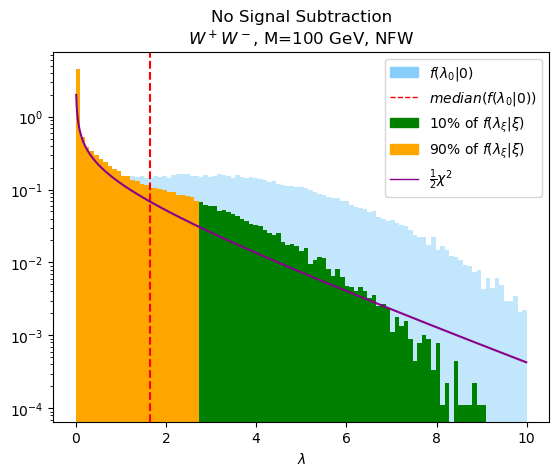

In [68]:
bin = np.linspace(0, 10, 100)
plt.hist(Tbkg, bin, density=True, alpha=0.5, label=r"$f(\lambda_0|0)$", color='lightskyblue')
plt.axvline(x=1.64, color='r', linestyle='--', label=r"$median(f(\lambda_0|0))$")


x = np.arange(0, 10, 0.01)
plt.plot(x, 1/2*chi2.pdf(x, df=1), label=r"$\chi^2$", color='darkmagenta')
plt.semilogy()
# plt.ylim(1e-4, 1)

# plt.axvline(x=np.median(Tbkg), color='r', linestyle='--')

plt.title("No Signal Subtraction\n"+r"$W^+W^-$, M=100 GeV, NFW")
# plt.title("No Signal Subtraction\n"+r"$\nu_\mu \bar{\nu}_\mu$, M=200 GeV, NFW")

# 90 % quantile
x90 = np.quantile(T90, 0.9)
N, bins, patches = plt.hist(T90, bin, density=True)

for i in range(bin.size-1):
    if bin[i] > x90:
        patches[i].set_facecolor('green')
    else:    
        patches[i].set_facecolor('orange')
np.median(Tbkg)
plt.legend()

from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

legend_elements = [Rectangle((0,0),0,0,color='lightskyblue', label=r"$f(\lambda_0|0)$"),
                Line2D([0], [0], color='r', ls='--', lw=1, label=r"$median(f(\lambda_0|0))$"),
                Rectangle((0,0),0,0,color='green', label='10% of '+r'$f(\lambda_{\xi}|\xi)$'),
                Rectangle((0,0),0,0,color='orange', label='90% of '+r'$f(\lambda_{\xi}|\xi)$'),
                Line2D([0], [0], color='darkmagenta', ls='-', lw=1, label=r"$\frac{1}{2} \chi^2$")]
                   
plt.legend(handles=legend_elements, loc='upper right')
plt.xlabel(r"$\lambda$")

In [2]:
Bin = Std_Binning(1500, N_Etrue=500)

In [3]:
Bin['true_energy_center']

array([1.00000000e+00, 4.00400802e+00, 7.00801603e+00, 1.00120240e+01,
       1.30160321e+01, 1.60200401e+01, 1.90240481e+01, 2.20280561e+01,
       2.50320641e+01, 2.80360721e+01, 3.10400802e+01, 3.40440882e+01,
       3.70480962e+01, 4.00521042e+01, 4.30561122e+01, 4.60601202e+01,
       4.90641283e+01, 5.20681363e+01, 5.50721443e+01, 5.80761523e+01,
       6.10801603e+01, 6.40841683e+01, 6.70881764e+01, 7.00921844e+01,
       7.30961924e+01, 7.61002004e+01, 7.91042084e+01, 8.21082164e+01,
       8.51122244e+01, 8.81162325e+01, 9.11202405e+01, 9.41242485e+01,
       9.71282565e+01, 1.00132265e+02, 1.03136273e+02, 1.06140281e+02,
       1.09144289e+02, 1.12148297e+02, 1.15152305e+02, 1.18156313e+02,
       1.21160321e+02, 1.24164329e+02, 1.27168337e+02, 1.30172345e+02,
       1.33176353e+02, 1.36180361e+02, 1.39184369e+02, 1.42188377e+02,
       1.45192385e+02, 1.48196393e+02, 1.51200401e+02, 1.54204409e+02,
       1.57208417e+02, 1.60212425e+02, 1.63216433e+02, 1.66220441e+02,
      

# <font color="darkmagenta"> Set upper limit on cross-section </font>

In [21]:
# Load the rate precomputed by Nadege fro cross-check!
def LoadNadege(ch, mass , profile):
    # Accessing Nadege's result:
    # file1 = "OscNext_L7_v02.00_1X0000_PDF_Signal_PID3_psi18_E50_sklearnKDEappliedfromReco_0.03Bandwidth_RemovedHighWeightEventTrue_PostCutFinalL7_PPPC4Spectra_PredefinedBinning_UncertaintyIncluded_newCuts.pkl"
    file2 = "OscNext_L7_v02.00_1X0000_PDF_Signal_PID3_psi18_E50_sklearnKDEappliedfromReco_0.03Bandwidth_RemovedHighWeightEventTrue_PostCutFinalL7_PPPC4Spectra_PredefinedBinning_UncertaintyIncluded.pkl"

    # nadege1 = pkl.load(open("/data/user/niovine/projects/DarkMatter_OscNext/Histograms/Signal/PPPC4/{}".format(file1), "rb"))
    nadege2 = pkl.load(open("/data/user/niovine/projects/DarkMatter_OscNext/Histograms/Signal/PPPC4/{}".format(file2), "rb"))
    Nad = nadege2["{}_{}_{}".format(profile, ch, mass)]['PDF_norm']
    Ntot = nadege2["{}_{}_{}".format(profile, ch, mass)]['Ntot']
    return (Nad[0]+Nad[1]+Nad[2])* Ntot

In [25]:
test = LoadNadege("WW", 90, "NFW")
np.sum(test)

3.003600023628509e+18

In [27]:
Bin = Std_Binning(100)
Reco = RecoRate("WW", 90, "NFW", Bin, type="evtbyevt", spectra="PPPC4")
Rate = Reco.ComputeRecoRate()
np.sum(Rate)

********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 828973025309246.8
##Applying cut on weight##
Weight lim: 278182715387838.12
##Applying cut on weight##
Weight lim: 3101381637156500.0
##Applying cut on weight##
Weight lim: 738572907557166.2
##Applying cut on weight##
Weight lim: 661301253126822.1
##Applying cut on weight##
Weight lim: 730930416059567.6
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 5141999)
Correct bias at boundary psi=0 using mirror data i.e reflection


1.0149795029000146e+18

In [4]:
def UpperLimit(Rate, Rate_Scr, Bkg, Data, LLH="SignalSub", CL=1.64, deltaxi=5e-5, exposure= 2933.8*24*60*60):
    SignalPDF = PdfBase(Rate.flatten()/np.sum(Rate.flatten()), name="SignalPDF")
    ScrSignalPDF = PdfBase(Rate_Scr.flatten()/np.sum(Rate_Scr.flatten()), name="ScrSignalPDF")
    BkgPDF = PdfBase(Bkg.flatten()/np.sum(Bkg.flatten()), name="Bkg")
    DataPDF = PdfBase(Data.flatten()/np.sum(Data.flatten()), name="Data")


    sig_fit = Parameter(value=0.001, limits=(0,1), fixed=False, name="fit")
    sig_fix = Parameter(value=0.0, limits=(0,1), fixed=True, name="fix")
    sig_inj = Parameter(value=0.0, limits=(0,1), fixed=True, name="inj")

    # signal subtraction
    if LLH=="SignalSub":
        modelH1 = (sig_fit* SignalPDF) + (1-sig_fit)*(BkgPDF) + sig_fit* BkgPDF - sig_fit*ScrSignalPDF
        modelH0 = (sig_fix* SignalPDF) + (1-sig_fix)*(BkgPDF) + sig_fix* BkgPDF - sig_fix*ScrSignalPDF
    elif LLH=="Poisson":
    # # in case of normal likelihood:
        modelH1 = (sig_fit* SignalPDF) + (1-sig_fit)*(BkgPDF)
        modelH0 = (sig_fix* SignalPDF) + (1-sig_fix)*(BkgPDF)

    lr = LikelihoodRatioTest(model = modelH1, null_model = modelH0)
    # pseudo_data = (sig_inj* SignalPDF) + (1-sig_inj)*(BkgPDF) + sig_inj* BkgPDF - sig_inj*ScrSignalPDF
    pseudo_data = (sig_inj* SignalPDF) + (1-sig_inj)*(BkgPDF)
    data = DataSet()
    data.asimov(np.sum(Data), DataPDF)
    lr.data = data

    T = np.array([0])
    x = deltaxi
    xi = np.array([0])
    while T[-1]<CL*1.5:
        xi = np.append(xi,x)
        lr.models['H0'].parameters["fix"].value = x
        lr.fit("H0")
        lr.fit("H1")
        if lr.models['H1'].parameters["fit"].value > x:
            T = np.append(T, 0)
        else:    
            T = np.append(T, lr.TS)
        x+=deltaxi
        
    
    f = interp1d(T, xi)
    xi_CL = f(CL)

    # Convert to thermal cross-section:
    Nsignal = xi_CL* np.sum(Data)
    sigma = Nsignal/(np.sum(Rate*exposure))
    return sigma

In [29]:
# First the signal pdf

# channel and mass
channel = "WW"
mass = 90
profile='Burkert'
# Bin
Bin = Std_Binning(mass)
Reco = RecoRate(channel, mass, profile, Bin, type="Resp")
Rate = Reco.ComputeRecoRate()
Reco.Scramble = True
Rate_Scr = Reco.ComputeRecoRate()


********************
Buiding final reco rate using Resp method
********************
Computing true rate with Charon spectra
channel: WW || mass: 90 || profile: Burkert || process: ann

Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5
********************
Computing Response Matrix
********************
Accessing MC set 0000
********************
Buiding final reco rate using Resp method
********************
Computing true rate with Charon spectra
channel: WW || mass: 90 || profile: Burkert || process: ann

Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/Spectra_PYTHIA.hdf5
********************
Computing Response Matrix
********************
Accessing MC set 0000


In [30]:
Bkg_bwISJ = ScrambleBkg(Bin, bw="ISJ", oversample=10)

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2012_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2013_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2014_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2015_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2016_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2017_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscN

In [34]:
BurnSample = DataHist(Bin)
UL = UpperLimit(Rate, Rate_Scr, Bkg_bwISJ, 10*np.sum(BurnSample)*Bkg_bwISJ)

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2012_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2013_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2014_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2015_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2016_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2017_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscN

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


In [35]:
UL

3.349366359666913e-23

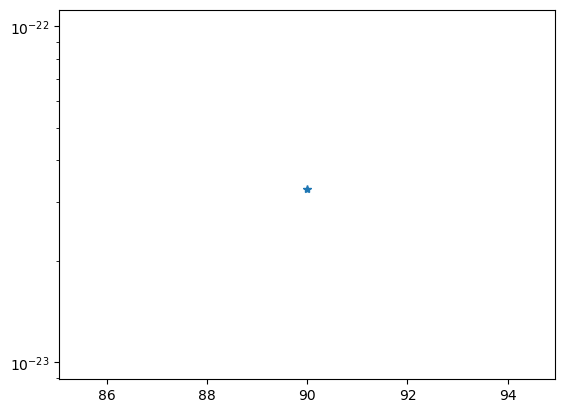

In [96]:
plt.plot(mass, UL, marker='*')
plt.yscale('log')

In [12]:
%%capture
channel = ["numunumu", 'nuenue', 'nutaunutau']
profile='NFW'
Bin = Std_Binning(300, N_Etrue=100)
Bkg_bwISJ = ScrambleBkg(Bin, bw="ISJ", oversample=10)
BurnSample = DataHist(Bin)
# m = [90,100,200,400,600,800,1000, 2000, 3000, 8000]
m = [5,10,30,50,70,90,100,200]
UL_PPPC4_evtbyevt = dict()

for ch in channel:
    UL_PPPC4_evtbyevt[ch] = np.array([])
    for mass in m:
        # Bin
        Bin = Std_Binning(mass, N_Etrue=100)
        Reco = RecoRate(ch, mass, profile, Bin, type="evtbyevt", spectra='PPPC4')
        # Rate = Reco.ComputeRecoRate()
        Rate = LoadNadege(ch, mass, profile)
        Reco.Scramble = True
        Rate_Scr = Reco.ComputeRecoRate()
        UL_PPPC4_evtbyevt[ch] = np.append(UL_PPPC4_evtbyevt[ch], UpperLimit(Rate, Rate_Scr, Bkg_bwISJ, 10*np.sum(BurnSample)*Bkg_bwISJ/(np.sum(Bkg_bwISJ))))

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2012_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2013_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2014_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2015_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2016_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2017_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscN

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 6313413635198582.0
##Applying cut on weight##
Weight lim: 1.5249991232631294e+16
##Applying cut on weight##
Weight lim: 3743629476488432.5
##Applying cut on weight##
Weight lim: 1.1770828022798302e+16
##Applying cut on weight##
Weight lim: 7671370016493347.0
##Applying cut on weight##
Weight lim: 1912193468616286.0
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 1294664)
Correct bias at boundary psi=0 using mirror data i.e reflection
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 6313413635198582.0
##Applying cut on weight##
Weight lim: 1.5249991232631294e+16
##Applying cut on weight##
Weight lim: 3743629476488432.5
##Applying cut on weight##
Weight lim: 1.1770828022798302e+16
##Applying cut on weight##
Weight lim: 7671370016493347.

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 1.6567835651701496e+16
##Applying cut on weight##
Weight lim: 1.3510543591904768e+16
##Applying cut on weight##
Weight lim: 1.0011040429422762e+16
##Applying cut on weight##
Weight lim: 1.8414554265815944e+16
##Applying cut on weight##
Weight lim: 6990396177003868.0
##Applying cut on weight##
Weight lim: 7701573168573015.0
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 3558077)
Correct bias at boundary psi=0 using mirror data i.e reflection
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 1.6567835651701496e+16
##Applying cut on weight##
Weight lim: 1.3510543591904768e+16
##Applying cut on weight##
Weight lim: 1.0011040429422762e+16
##Applying cut on weight##
Weight lim: 1.8414554265815944e+16
##Applying cut on weight##
Weight lim: 6

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 1.1651364008273632e+16
##Applying cut on weight##
Weight lim: 9850033512771100.0
##Applying cut on weight##
Weight lim: 2.7357417756678572e+16
##Applying cut on weight##
Weight lim: 3.323515515588053e+16
##Applying cut on weight##
Weight lim: 7918804729043131.0
##Applying cut on weight##
Weight lim: 7371447637885206.0
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 4450768)
Correct bias at boundary psi=0 using mirror data i.e reflection
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 1.1651364008273632e+16
##Applying cut on weight##
Weight lim: 9850033512771100.0
##Applying cut on weight##
Weight lim: 2.7357417756678572e+16
##Applying cut on weight##
Weight lim: 3.323515515588053e+16
##Applying cut on weight##
Weight lim: 79188047290

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 2.186464244344653e+16
##Applying cut on weight##
Weight lim: 4942173817917339.0
##Applying cut on weight##
Weight lim: 9180124244720950.0
##Applying cut on weight##
Weight lim: 9625690890687982.0
##Applying cut on weight##
Weight lim: 5082413840116605.0
##Applying cut on weight##
Weight lim: 4401521847181751.0
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 4890188)
Correct bias at boundary psi=0 using mirror data i.e reflection
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 2.186464244344653e+16
##Applying cut on weight##
Weight lim: 4942173817917339.0
##Applying cut on weight##
Weight lim: 9180124244720950.0
##Applying cut on weight##
Weight lim: 9625690890687982.0
##Applying cut on weight##
Weight lim: 5082413840116605.0
##Applyi

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 6134382932723786.0
##Applying cut on weight##
Weight lim: 4260512704394650.5
##Applying cut on weight##
Weight lim: 5084032302769625.0
##Applying cut on weight##
Weight lim: 2.58644998669875e+16
##Applying cut on weight##
Weight lim: 3590226014259783.5
##Applying cut on weight##
Weight lim: 7848557459957118.0
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 5141999)
Correct bias at boundary psi=0 using mirror data i.e reflection
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 6134382932723786.0
##Applying cut on weight##
Weight lim: 4260512704394650.5
##Applying cut on weight##
Weight lim: 5084032302769625.0
##Applying cut on weight##
Weight lim: 2.58644998669875e+16
##Applying cut on weight##
Weight lim: 3590226014259783.5
##Applying

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 7498329006016579.0
##Applying cut on weight##
Weight lim: 6714721218590408.0
##Applying cut on weight##
Weight lim: 3614570083228162.5
##Applying cut on weight##
Weight lim: 1.1821384694301812e+16
##Applying cut on weight##
Weight lim: 3691686809541211.5
##Applying cut on weight##
Weight lim: 3879975290406661.5
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 5229857)
Correct bias at boundary psi=0 using mirror data i.e reflection
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 7498329006016579.0
##Applying cut on weight##
Weight lim: 6714721218590408.0
##Applying cut on weight##
Weight lim: 3614570083228162.5
##Applying cut on weight##
Weight lim: 1.1821384694301812e+16
##Applying cut on weight##
Weight lim: 3691686809541211.5
##Appl

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 3486407836222861.5
##Applying cut on weight##
Weight lim: 6901022458987492.0
##Applying cut on weight##
Weight lim: 3750749493985426.5
##Applying cut on weight##
Weight lim: 2163279986258408.0
##Applying cut on weight##
Weight lim: 1980199655400209.8
##Applying cut on weight##
Weight lim: 2853996911910250.0
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 5600453)
Correct bias at boundary psi=0 using mirror data i.e reflection
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 3486407836222861.5
##Applying cut on weight##
Weight lim: 6901022458987492.0
##Applying cut on weight##
Weight lim: 3750749493985426.5
##Applying cut on weight##
Weight lim: 2163279986258408.0
##Applying cut on weight##
Weight lim: 1980199655400209.8
##Applying cut

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 7847111221663310.0
##Applying cut on weight##
Weight lim: 4949197642130095.0
##Applying cut on weight##
Weight lim: 736734428978168.5
##Applying cut on weight##
Weight lim: 3825193980156145.5
##Applying cut on weight##
Weight lim: 5973448130712146.0
##Applying cut on weight##
Weight lim: 228410902072566.2
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 373655)
Correct bias at boundary psi=0 using mirror data i.e reflection
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 7847111221663310.0
##Applying cut on weight##
Weight lim: 4949197642130095.0
##Applying cut on weight##
Weight lim: 736734428978168.5
##Applying cut on weight##
Weight lim: 3825193980156145.5
##Applying cut on weight##
Weight lim: 5973448130712146.0
##Applying cut on 

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 6800030583664594.0
##Applying cut on weight##
Weight lim: 1.5655145214588368e+16
##Applying cut on weight##
Weight lim: 3627755162466572.5
##Applying cut on weight##
Weight lim: 1.2678084341541336e+16
##Applying cut on weight##
Weight lim: 7875179058861703.0
##Applying cut on weight##
Weight lim: 1853006493023597.0
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 1294664)
Correct bias at boundary psi=0 using mirror data i.e reflection
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 6800030583664594.0
##Applying cut on weight##
Weight lim: 1.5655145214588368e+16
##Applying cut on weight##
Weight lim: 3627755162466572.5
##Applying cut on weight##
Weight lim: 1.2678084341541336e+16
##Applying cut on weight##
Weight lim: 7875179058861703.

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 1.78448293817763e+16
##Applying cut on weight##
Weight lim: 1.3869484816930014e+16
##Applying cut on weight##
Weight lim: 9701174709620660.0
##Applying cut on weight##
Weight lim: 1.9833886931465252e+16
##Applying cut on weight##
Weight lim: 7176113454041410.0
##Applying cut on weight##
Weight lim: 7463191001373432.0
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 3558077)
Correct bias at boundary psi=0 using mirror data i.e reflection
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 1.78448293817763e+16
##Applying cut on weight##
Weight lim: 1.3869484816930014e+16
##Applying cut on weight##
Weight lim: 9701174709620660.0
##Applying cut on weight##
Weight lim: 1.9833886931465252e+16
##Applying cut on weight##
Weight lim: 7176113454041

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 1.2549412437662578e+16
##Applying cut on weight##
Weight lim: 1.0111724174702142e+16
##Applying cut on weight##
Weight lim: 2.651064004112909e+16
##Applying cut on weight##
Weight lim: 3.5796810500872076e+16
##Applying cut on weight##
Weight lim: 8129187490539235.0
##Applying cut on weight##
Weight lim: 7143283647898352.0
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 4450768)
Correct bias at boundary psi=0 using mirror data i.e reflection
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 1.2549412437662578e+16
##Applying cut on weight##
Weight lim: 1.0111724174702142e+16
##Applying cut on weight##
Weight lim: 2.651064004112909e+16
##Applying cut on weight##
Weight lim: 3.5796810500872076e+16
##Applying cut on weight##
Weight lim: 812

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 2.3549896443883296e+16
##Applying cut on weight##
Weight lim: 5073474968934967.0
##Applying cut on weight##
Weight lim: 8895977374371412.0
##Applying cut on weight##
Weight lim: 1.0367607165900692e+16
##Applying cut on weight##
Weight lim: 5217440816451574.0
##Applying cut on weight##
Weight lim: 4265284185870027.0
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 4890188)
Correct bias at boundary psi=0 using mirror data i.e reflection
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 2.3549896443883296e+16
##Applying cut on weight##
Weight lim: 5073474968934967.0
##Applying cut on weight##
Weight lim: 8895977374371412.0
##Applying cut on weight##
Weight lim: 1.0367607165900692e+16
##Applying cut on weight##
Weight lim: 5217440816451574.

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 6607200789422027.0
##Applying cut on weight##
Weight lim: 4373703830935801.0
##Applying cut on weight##
Weight lim: 4926669305376786.0
##Applying cut on weight##
Weight lim: 2.7858049589233308e+16
##Applying cut on weight##
Weight lim: 3685609306198389.0
##Applying cut on weight##
Weight lim: 7605625776294141.0
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 5141999)
Correct bias at boundary psi=0 using mirror data i.e reflection
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 6607200789422027.0
##Applying cut on weight##
Weight lim: 4373703830935801.0
##Applying cut on weight##
Weight lim: 4926669305376786.0
##Applying cut on weight##
Weight lim: 2.7858049589233308e+16
##Applying cut on weight##
Weight lim: 3685609306198389.0
##Appl

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 8076275294718315.0
##Applying cut on weight##
Weight lim: 6893114504064722.0
##Applying cut on weight##
Weight lim: 3502690467067305.0
##Applying cut on weight##
Weight lim: 1.2732537753324062e+16
##Applying cut on weight##
Weight lim: 3789765660093177.0
##Applying cut on weight##
Weight lim: 3759880746322839.0
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 5229857)
Correct bias at boundary psi=0 using mirror data i.e reflection
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 8076275294718315.0
##Applying cut on weight##
Weight lim: 6893114504064722.0
##Applying cut on weight##
Weight lim: 3502690467067305.0
##Applying cut on weight##
Weight lim: 1.2732537753324062e+16
##Applying cut on weight##
Weight lim: 3789765660093177.0
##Appl

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 3755128569607821.5
##Applying cut on weight##
Weight lim: 7084365300701560.0
##Applying cut on weight##
Weight lim: 3634654798344368.0
##Applying cut on weight##
Weight lim: 2330018420682137.0
##Applying cut on weight##
Weight lim: 2032808588947920.8
##Applying cut on weight##
Weight lim: 2765658860170602.5
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 5600453)
Correct bias at boundary psi=0 using mirror data i.e reflection
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 3755128569607821.5
##Applying cut on weight##
Weight lim: 7084365300701560.0
##Applying cut on weight##
Weight lim: 3634654798344368.0
##Applying cut on weight##
Weight lim: 2330018420682137.0
##Applying cut on weight##
Weight lim: 2032808588947920.8
##Applying cut

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 9292209607647836.0
##Applying cut on weight##
Weight lim: 6513966165055464.0
##Applying cut on weight##
Weight lim: 3712129904907076.5
##Applying cut on weight##
Weight lim: 4529629216341021.0
##Applying cut on weight##
Weight lim: 7862049937336066.0
##Applying cut on weight##
Weight lim: 1150877313235350.5
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 373655)
Correct bias at boundary psi=0 using mirror data i.e reflection
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 9292209607647836.0
##Applying cut on weight##
Weight lim: 6513966165055464.0
##Applying cut on weight##
Weight lim: 3712129904907076.5
##Applying cut on weight##
Weight lim: 4529629216341021.0
##Applying cut on weight##
Weight lim: 7862049937336066.0
##Applying cut 

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 8052302017510310.0
##Applying cut on weight##
Weight lim: 2.0604771441895468e+16
##Applying cut on weight##
Weight lim: 1.827890471326439e+16
##Applying cut on weight##
Weight lim: 1.501283896675406e+16
##Applying cut on weight##
Weight lim: 1.036504371870264e+16
##Applying cut on weight##
Weight lim: 9336608343769574.0
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 1294664)
Correct bias at boundary psi=0 using mirror data i.e reflection
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 8052302017510310.0
##Applying cut on weight##
Weight lim: 2.0604771441895468e+16
##Applying cut on weight##
Weight lim: 1.827890471326439e+16
##Applying cut on weight##
Weight lim: 1.501283896675406e+16
##Applying cut on weight##
Weight lim: 1.03650437

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 2.1131074906955468e+16
##Applying cut on weight##
Weight lim: 1.825454575811781e+16
##Applying cut on weight##
Weight lim: 4.888059976002318e+16
##Applying cut on weight##
Weight lim: 2.3486430801792204e+16
##Applying cut on weight##
Weight lim: 9444957267074584.0
##Applying cut on weight##
Weight lim: 3.760423486745001e+16
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 3558077)
Correct bias at boundary psi=0 using mirror data i.e reflection
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 2.1131074906955468e+16
##Applying cut on weight##
Weight lim: 1.825454575811781e+16
##Applying cut on weight##
Weight lim: 4.888059976002318e+16
##Applying cut on weight##
Weight lim: 2.3486430801792204e+16
##Applying cut on weight##
Weight lim: 94

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 1.4860471265101542e+16
##Applying cut on weight##
Weight lim: 1.3308708584132094e+16
##Applying cut on weight##
Weight lim: 1.3357722379201915e+17
##Applying cut on weight##
Weight lim: 4.2389034265382376e+16
##Applying cut on weight##
Weight lim: 1.0699361005913286e+16
##Applying cut on weight##
Weight lim: 3.5992341073804964e+16
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 4450768)
Correct bias at boundary psi=0 using mirror data i.e reflection
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 1.4860471265101542e+16
##Applying cut on weight##
Weight lim: 1.3308708584132094e+16
##Applying cut on weight##
Weight lim: 1.3357722379201915e+17
##Applying cut on weight##
Weight lim: 4.2389034265382376e+16
##Applying cut on weight##
Weigh

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 2.788676849524501e+16
##Applying cut on weight##
Weight lim: 6677535769752449.0
##Applying cut on weight##
Weight lim: 4.48235108145861e+16
##Applying cut on weight##
Weight lim: 1.2276871856912554e+16
##Applying cut on weight##
Weight lim: 6867018737994368.0
##Applying cut on weight##
Weight lim: 2.149117559397316e+16
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 4890188)
Correct bias at boundary psi=0 using mirror data i.e reflection
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 2.788676849524501e+16
##Applying cut on weight##
Weight lim: 6677535769752449.0
##Applying cut on weight##
Weight lim: 4.48235108145861e+16
##Applying cut on weight##
Weight lim: 1.2276871856912554e+16
##Applying cut on weight##
Weight lim: 686701873799

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 7823961317845582.0
##Applying cut on weight##
Weight lim: 5756520719271040.0
##Applying cut on weight##
Weight lim: 2.482364844200715e+16
##Applying cut on weight##
Weight lim: 3.298829706004013e+16
##Applying cut on weight##
Weight lim: 4850874031342386.0
##Applying cut on weight##
Weight lim: 3.832191055448857e+16
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 5141999)
Correct bias at boundary psi=0 using mirror data i.e reflection
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 7823961317845582.0
##Applying cut on weight##
Weight lim: 5756520719271040.0
##Applying cut on weight##
Weight lim: 2.482364844200715e+16
##Applying cut on weight##
Weight lim: 3.298829706004013e+16
##Applying cut on weight##
Weight lim: 4850874031342386.0

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 9563575788299228.0
##Applying cut on weight##
Weight lim: 9072483642420352.0
##Applying cut on weight##
Weight lim: 1.7648750375990342e+16
##Applying cut on weight##
Weight lim: 1.5077320341089594e+16
##Applying cut on weight##
Weight lim: 4987961093570556.0
##Applying cut on weight##
Weight lim: 1.8944636232987748e+16
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 5229857)
Correct bias at boundary psi=0 using mirror data i.e reflection
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 9563575788299228.0
##Applying cut on weight##
Weight lim: 9072483642420352.0
##Applying cut on weight##
Weight lim: 1.7648750375990342e+16
##Applying cut on weight##
Weight lim: 1.5077320341089594e+16
##Applying cut on weight##
Weight lim: 4987961093570

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 4446660788462029.5
##Applying cut on weight##
Weight lim: 9324201457709318.0
##Applying cut on weight##
Weight lim: 1.8313669403524756e+16
##Applying cut on weight##
Weight lim: 2759107006718613.5
##Applying cut on weight##
Weight lim: 2675513755080622.0
##Applying cut on weight##
Weight lim: 1.3935123102431712e+16
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 5600453)
Correct bias at boundary psi=0 using mirror data i.e reflection
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 4446660788462029.5
##Applying cut on weight##
Weight lim: 9324201457709318.0
##Applying cut on weight##
Weight lim: 1.8313669403524756e+16
##Applying cut on weight##
Weight lim: 2759107006718613.5
##Applying cut on weight##
Weight lim: 2675513755080622.0
##

/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


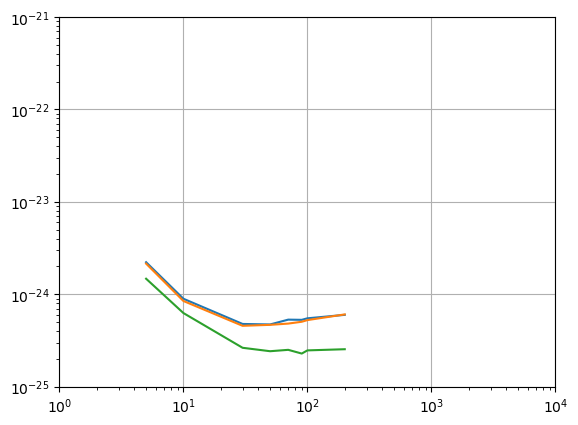

In [13]:
for ch in channel:
    plt.plot(m, UL_PPPC4_evtbyevt[ch])

plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-25, 1e-21)
plt.xlim(1, 1e4)
plt.grid()


In [31]:
%%capture
channel = "WW"
profile='Burkert'
Bin = Std_Binning(300, N_Etrue=100)
Bkg_bwISJ = ScrambleBkg(Bin, bw="ISJ", oversample=10)
UL2 = np.array([])
for mass in [90,100,200,400,600,800,1000, 2000, 3000, 8000]:
    # Bin
    if mass <1400:
        Bin = Std_Binning(mass, N_Etrue=100)
    else:
        Bin = Std_Binning(1400, N_Etrue=100)
    Reco = RecoRate(channel, mass, profile, Bin, type="Resp", spectra='Charon')
    Rate = Reco.ComputeRecoRate()
    Reco.Scramble = True
    Rate_Scr = Reco.ComputeRecoRate()
    BurnSample = DataHist(Bin)
    UL2 = np.append(UL2, UpperLimit(Rate, Rate_Scr, Bkg_bwISJ, 10*np.sum(BurnSample)*Bkg_bwISJ/(np.sum(Bkg_bwISJ))))

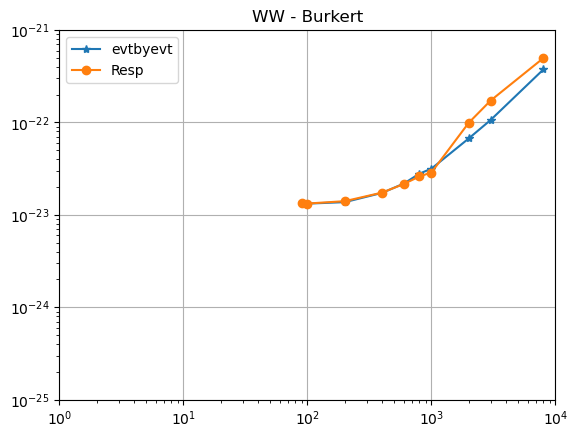

In [8]:
plt.plot([90,100,200,400,600,800,1000, 2000, 3000, 8000], UL, marker='*', label='evtbyevt')
plt.plot([90,100,200,400,600,800,1000, 2000, 3000, 8000], UL2, marker='o', label='Resp')
plt.title("WW - Burkert")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-25, 1e-21)
plt.xlim(1, 1e4)
plt.grid()
plt.legend()


In [29]:

channel = "WW"
mass = 8000
profile='Burkert'
Bin = Std_Binning(2000, N_Etrue=100)
Reco_resp = RecoRate(channel, 
            mass, 
            profile, 
            Bin,
            type="Resp",
            PreCompResp=True,
            spectra='PPPC4')

Reco_evtbyevt = RecoRate(channel, 
            mass, 
            profile, 
            Bin,
            type="evtbyevt",
            spectra='PPPC4')

Reco_scr_resp = RecoRate(channel, 
            mass, 
            profile, 
            Bin,
            type="Resp",
            PreCompResp=True,
            spectra='PPPC4',
            Scramble=True)

Reco_scr_evtbyevt = RecoRate(channel, 
            mass, 
            profile, 
            Bin,
            type="evtbyevt",
            PreCompResp=True,
            spectra='PPPC4',
            Scramble=True)

In [30]:
RecoHist_resp = Reco_resp.ComputeRecoRate()
RecoHist_evtbyevt = Reco_evtbyevt.ComputeRecoRate()
RecoHist_resp_scr = Reco_scr_resp.ComputeRecoRate()
RecoHist_evtbyevt_scr = Reco_scr_evtbyevt.ComputeRecoRate()

Bkg_bwISJ = ScrambleBkg(Bin, bw="ISJ", oversample=10)


********************
Buiding final reco rate using Resp method
********************
Computing true rate with PPPC4 spectra
channel: WW || mass: 8000 || profile: Burkert || process: ann

********************
Computing Response Matrix
********************
Accessing MC set 0000
********************
Buiding final reco rate using evtbyevt method
********************
Accessing MC set 0000
##Applying cut on weight##
Weight lim: 1175847552558.997
##Applying cut on weight##
Weight lim: 608004290495.0422
##Applying cut on weight##
Weight lim: 2563452985917.6245
##Applying cut on weight##
Weight lim: 1132832034433.9202
##Applying cut on weight##
Weight lim: 879386035006.1173
##Applying cut on weight##
Weight lim: 3925175570185.592
Preparing evaluation grid
Computing [0, 1] PID bin
(2, 5803920)
Correct bias at boundary psi=0 using mirror data i.e reflection
dimension: 2
bandwidth: 
[0.09876898 0.00092793]
********************
Buiding final reco rate using Resp method
********************
Computing

In [31]:
np.sum(RecoHist_evtbyevt)/np.sum(RecoHist_resp)

nan

/tmp/ipykernel_8274/897875855.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(RecoHist_evtbyevt/np.sum(RecoHist_evtbyevt), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), "Psi", "Energy", "evtbyevt")


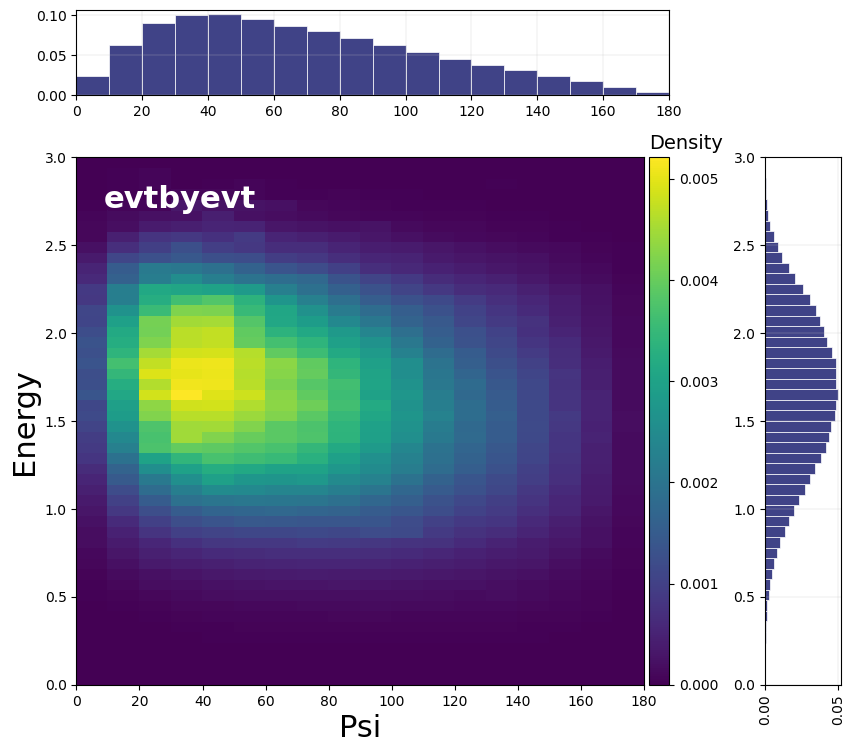

/tmp/ipykernel_8274/897875855.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(RecoHist_resp/np.sum(RecoHist_resp), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), "Psi", "Energy", "resp")


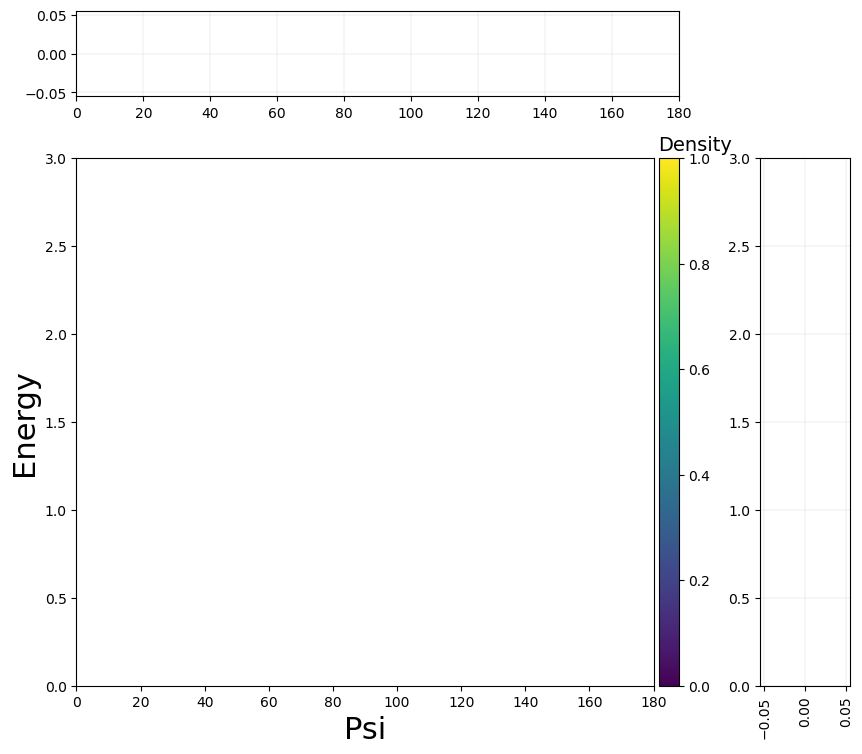

/tmp/ipykernel_8274/897875855.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections((RecoHist_resp/np.sum(RecoHist_resp))-(RecoHist_evtbyevt/np.sum(RecoHist_evtbyevt)), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), "Psi", "Energy", "Ratio")


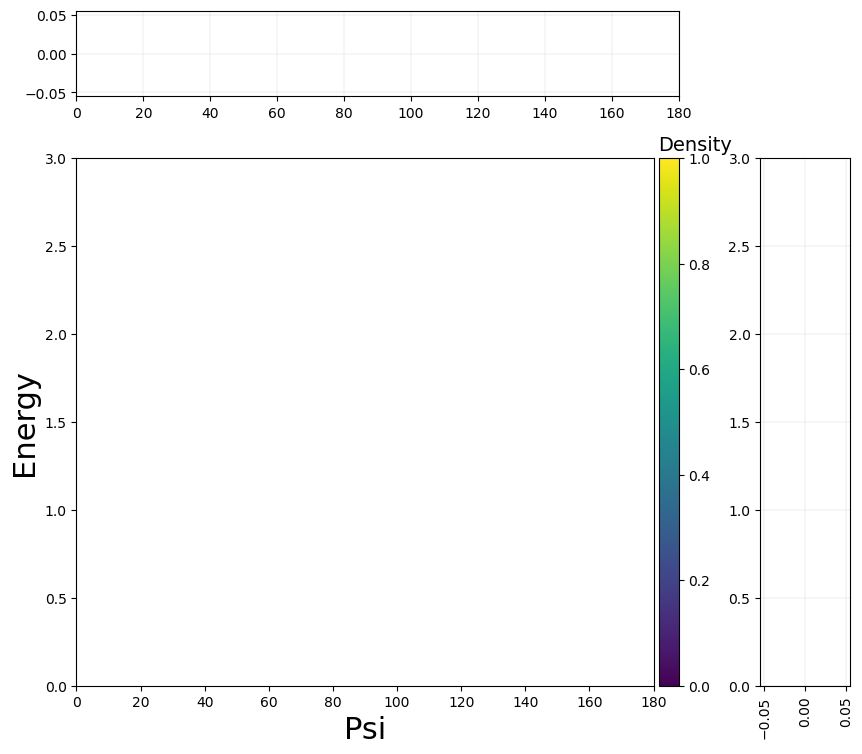

In [32]:
plot_projections(RecoHist_evtbyevt/np.sum(RecoHist_evtbyevt), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), "Psi", "Energy", "evtbyevt")
plot_projections(RecoHist_resp/np.sum(RecoHist_resp), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), "Psi", "Energy", "resp")
plot_projections((RecoHist_resp/np.sum(RecoHist_resp))-(RecoHist_evtbyevt/np.sum(RecoHist_evtbyevt)), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), "Psi", "Energy", "Ratio")



In [27]:
BurnSample = DataHist(Bin)
UpperLimit(RecoHist_evtbyevt, RecoHist_evtbyevt_scr, Bkg_bwISJ, 10*np.sum(BurnSample)*Bkg_bwISJ/(np.sum(Bkg_bwISJ)))

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2012_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2013_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2014_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2015_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2016_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Burnsample/OscNext_Level7_v02.00_burnsample_2017_pass2_variables_NoCut.pkl

Loading file: 
/data/user/niovine/projects/DarkMatter_OscN

3.5623541149602253e-22

In [28]:
UpperLimit(RecoHist_resp, RecoHist_resp_scr, Bkg_bwISJ, 10*np.sum(BurnSample)*Bkg_bwISJ/(np.sum(Bkg_bwISJ)))

Parameter fit already exists in the model, it won't be added again
PDF Bkg already exists in the model, it won't be added again
Parameter fit already exists in the model, it won't be added again
Parameter fit already exists in the model, it won't be added again
Parameter fix already exists in the model, it won't be added again
PDF Bkg already exists in the model, it won't be added again
Parameter fix already exists in the model, it won't be added again
Parameter fix already exists in the model, it won't be added again
Parameter inj already exists in the model, it won't be added again


/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1/RHEL_7_x86_64/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


4.751351790628394e-22